In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio

742


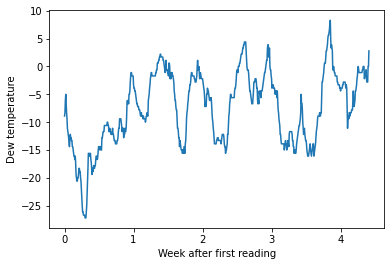

In [2]:
#This cell forms the mat file you were already given

"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""

data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

In [5]:
def packX(z,poly_order):
    X = np.zeros((len(z),poly_order))
    for k in range(poly_order):
        X[:,k] = np.power(z,k)
    return X


def solveLinearSystem(X,y):
    theta = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X,y)
print('Check number: ', np.sum(theta))


Check number:  1.7591487151696912


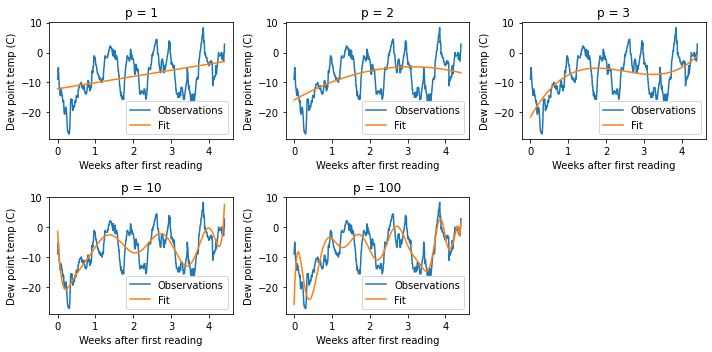

In [4]:

#Plot 
plt.figure(1,figsize = (10,5))
counter = 0
for poly_order in [1,2,3,10,100]:
    
    X = packX(weeks_after_start,poly_order)
    y = dewtemp + 0.
    
    #unregularized 
    theta = solveLinearSystem(X,y)
    ypred = np.dot(X,theta)
    

    counter += 1
    plt.figure(1)
    plt.subplot(2,3,counter)
    
    plt.plot(weeks_after_start, y)
    plt.plot(weeks_after_start, ypred) 
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks after first reading')
    plt.ylabel('Dew point temp (C)')
    plt.legend(['Observations','Fit'])
    plt.tight_layout()
    plt.savefig('polyfit_unreg.png')
    
 


In [5]:


def solveRidgeRegressionSystem(X,y,rho):
    theta = np.linalg.solve(np.dot(X.T,X) + rho*np.eye(X.shape[1]), np.dot(X.T,y))
    return theta

# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number: ', np.sum(theta))


Check number:  1.2061712965226048


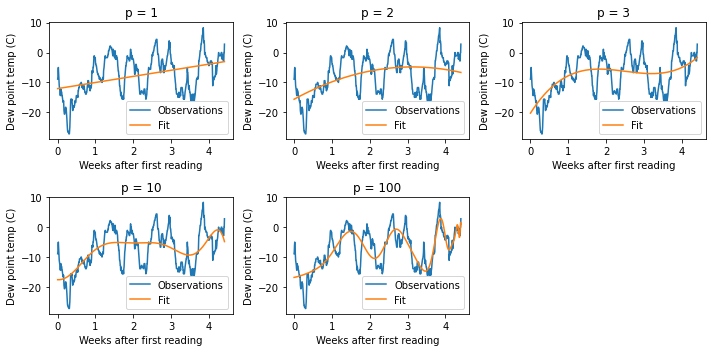

In [6]:


#Plot 
plt.figure(1,figsize = (10,5))
counter = 0
for poly_order in [1,2,3,10,100]:
    
    X = packX(weeks_after_start,poly_order)
    y = dewtemp + 0.
    
    #unregularized 
    theta = solveRidgeRegressionSystem(X,y,1.)
    ypred = np.dot(X,theta)
    

    counter += 1
    plt.figure(1)
    plt.subplot(2,3,counter)
    
    plt.plot(weeks_after_start, y)
    plt.plot(weeks_after_start, ypred) 
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks after first reading')
    plt.ylabel('Dew point temp (C)')
    plt.legend(['Observations','Fit'])
    plt.tight_layout()
    plt.savefig('polyfit_reg.png')
    
  


In [7]:

#calculate condition numbers
for poly_order in [1,2,5,10]:
    
    X = packX(weeks_after_start,poly_order)
    m,n = X.shape
    y = dewtemp + 0.
    
    A = np.dot(X.T,X) 
    A = (A + A.T)/2.
    for rho in [0.,1.,10., 100.]:
        
                    
    
        theta = solveRidgeRegressionSystem(X,y,rho*m)
        ypred = np.dot(X,theta)
        mse = np.mean(np.power(y-ypred,2.))
        print('%d, %.1f, %.2e, %.1f' % (poly_order, rho, np.linalg.cond(A+rho*m*np.eye(n)), mse ))
    
    
    


1, 0.0, 3.25e+01, 36.4
1, 1.0, 6.75e+00, 58.8
1, 10.0, 1.69e+00, 78.3
1, 100.0, 1.07e+00, 96.3
2, 0.0, 1.48e+03, 33.5
2, 1.0, 7.91e+01, 57.6
2, 10.0, 9.20e+00, 77.3
2, 100.0, 1.82e+00, 86.8
5, 0.0, 7.31e+08, 27.1
5, 1.0, 2.72e+05, 57.2
5, 10.0, 2.72e+04, 72.0
5, 100.0, 2.72e+03, 77.5
10, 0.0, 7.16e+18, 16.7
10, 1.0, 3.97e+11, 55.4
10, 10.0, 3.97e+10, 71.4
10, 100.0, 3.97e+09, 76.7


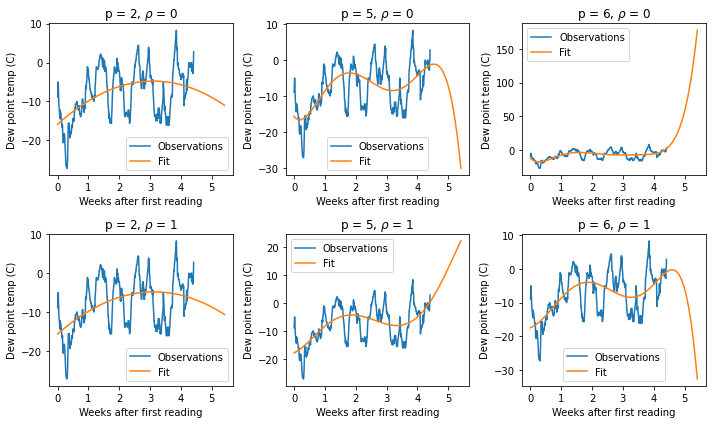

In [8]:

#create model
plt.figure(figsize = (10,6))
counter = 0
for rho in [0,1]:
    for poly_order in [2,5,6]:
        z = weeks_after_start
        zf = np.hstack([z, np.linspace(z[-1],z[-1]+1.,100)])

        X = packX(z,poly_order)
        Xf = packX(zf,poly_order)
        y = dewtemp + 0.
        #fit model

        theta = np.linalg.solve(np.dot(X.T,X) + rho*np.eye(poly_order+1), np.dot(X.T,y))
        ypred = np.dot(Xf,theta)

        counter += 1
        plt.subplot(2,3,counter)

        plt.plot(z, y)
        plt.plot(zf, ypred) 
        plt.title('p = %d, $\\rho$ = %d' % (poly_order,rho))

        plt.xlabel('Weeks after first reading')
        plt.ylabel('Dew point temp (C)')
        plt.legend(['Observations','Fit'])
plt.tight_layout()
plt.savefig('polyfit_forecast.png')
